In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [69]:
fraud = pd.read_csv('/home/sushil/Desktop/Fraud_check.csv')

In [70]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [71]:
fraud.shape

(600, 6)

In [72]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [73]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [74]:
fraud = fraud.rename(columns = {'Marital.Status' : 'marital_status' , 'Taxable.Income' : 'taxable_income' , 'City.Population' : 'city_population' , 'Work.Experience' : 'work_experience'})

In [75]:
fraud.head()

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [76]:
fraud.isnull().sum()

Undergrad          0
marital_status     0
taxable_income     0
city_population    0
work_experience    0
Urban              0
dtype: int64

<AxesSubplot:>

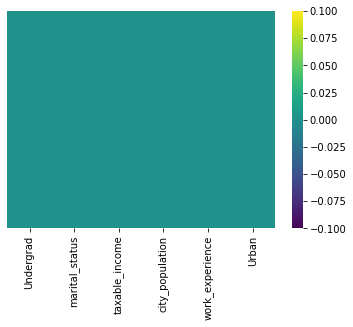

In [77]:
sns.heatmap(fraud.isnull(), yticklabels = False, cmap = 'viridis' )

In [78]:
def cal(i):
    
    if i <= 30000:
        return 'Risky'
    
    else:
        return 'Good'

In [79]:
fraud['taxable_income'] = fraud['taxable_income'].apply(cal)

In [80]:
fraud['taxable_income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable_income, Length: 600, dtype: object

<AxesSubplot:xlabel='taxable_income', ylabel='count'>

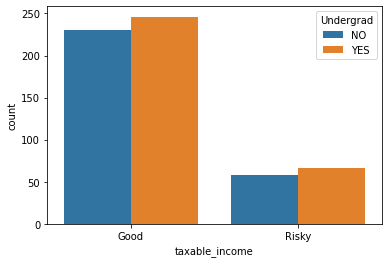

In [81]:
sns.countplot('taxable_income',hue = 'Undergrad', data = fraud)

In [82]:
fraud_new = pd.get_dummies(fraud[['Undergrad', 'marital_status', 'Urban']])

In [83]:
fraud_new.head()

,Undergrad_NO,Undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,Urban_NO,Urban_YES
0,1,0,0,0,1,0,1
1,0,1,1,0,0,0,1
2,1,0,0,1,0,0,1
3,0,1,0,0,1,0,1
4,1,0,0,1,0,1,0


In [84]:
fraud_new = pd.concat([fraud[['work_experience','city_population','taxable_income']],fraud_new],axis = 1)

In [85]:
fraud_new.head()

,work_experience,city_population,taxable_income,Undergrad_NO,Undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,Urban_NO,Urban_YES
0,10,50047,Good,1,0,0,0,1,0,1
1,18,134075,Good,0,1,1,0,0,0,1
2,30,160205,Good,1,0,0,1,0,0,1
3,15,193264,Good,0,1,0,0,1,0,1
4,28,27533,Good,1,0,0,1,0,1,0


In [86]:
x = fraud_new.drop('taxable_income',axis = 1)

In [87]:
x.head()

,work_experience,city_population,Undergrad_NO,Undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,Urban_NO,Urban_YES
0,10,50047,1,0,0,0,1,0,1
1,18,134075,0,1,1,0,0,0,1
2,30,160205,1,0,0,1,0,0,1
3,15,193264,0,1,0,0,1,0,1
4,28,27533,1,0,0,1,0,1,0


In [88]:
y = fraud_new['taxable_income']

In [89]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable_income, Length: 600, dtype: object

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4)

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
sm = SMOTE()

In [96]:
x_train,y_train = sm.fit_resample(x_train,y_train)

<AxesSubplot:xlabel='taxable_income', ylabel='count'>

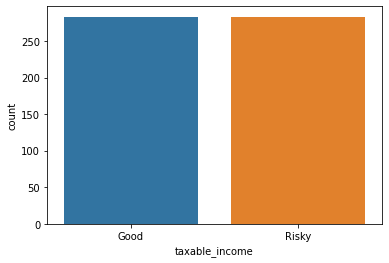

In [97]:
sns.countplot(y_train)

In [98]:
RF = RandomForestClassifier(n_jobs = 3, criterion = 'entropy', oob_score = True)

In [99]:
RF.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_jobs=3, oob_score=True)

In [100]:
RF.score(x_test,y_test)

0.6708333333333333

In [101]:
RF.score(x_train,y_train)

1.0

In [102]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size = 0.2)

In [103]:
x1_train,y1_train = sm.fit_resample(x1_train,y1_train)

In [104]:
RF = RandomForestClassifier(n_jobs = 5, criterion = 'entropy', oob_score = True)

In [105]:
RF.fit(x1_train,y1_train)

RandomForestClassifier(criterion='entropy', n_jobs=5, oob_score=True)

In [106]:
RF.score(x1_test,y1_test)

0.7666666666666667

In [107]:
RF.score(x1_train,y1_train)

1.0

In [110]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x,y,test_size = 0.35)

In [111]:
x2_train,y2_train = sm.fit_resample(x2_train,y2_train)

In [112]:
RF = RandomForestClassifier(n_jobs = 10, criterion = 'entropy', oob_score = True)

In [113]:
RF.fit(x2_train,y2_train)

RandomForestClassifier(criterion='entropy', n_jobs=10, oob_score=True)

In [114]:
RF.score(x2_test,y2_test)

0.7238095238095238

In [115]:
RF.score(x2_train,y2_train)

0.9984126984126984